# Big Mart Sales Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
 # number of data point(rows) and features(column)
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Categorical features are:
[ Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type ]

In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Handlig Missing Values
Mean--> Avarage value(for Item_Weight which is float value)
 And Mode--> Most repeated value(for Outlet_Size which is object value)

In [6]:
#Mean value of Item_Weight column
df["Item_Weight"].mean()

12.857645184136183

In [7]:
df["Outlet_Size"].mode()

0    Medium
dtype: object

In [8]:
#Fill missing value with the Mean value in Item_Weight column
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0],inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
#Mode value of Outlet_Size column
#Mode_Outlet_Size=df.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x: x.mode()[0]))
#Mode_Outlet_Size
#take a array to check a value is missing or not in Outlet_Size
#missing_values=df["Outlet_Size"].isnull()
#missing_values

In [10]:
#check if any missing values exists or not
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis

In [11]:
# Statistical measure about data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
sns.set()

C:\Anacondas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


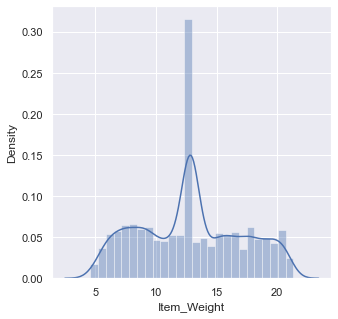

In [13]:
#item weight distribution
plt.figure(figsize=(5,5))
sns.distplot(df["Item_Weight"])
plt.show()

C:\Anacondas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


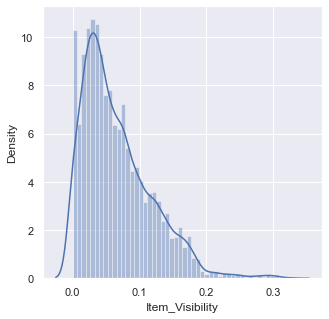

In [14]:
#Item_Visibility distribution
plt.figure(figsize=(5,5))
sns.distplot(df["Item_Visibility"])
plt.show()

C:\Anacondas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


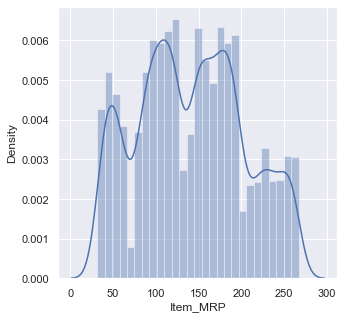

In [15]:
#Item_MRP distribution
plt.figure(figsize=(5,5))
sns.distplot(df["Item_MRP"])
plt.show()

C:\Anacondas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


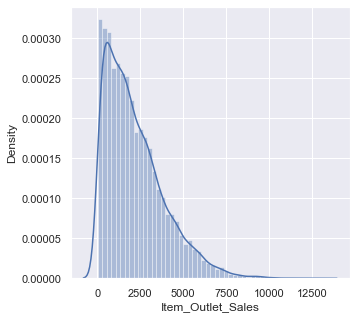

In [16]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(5,5))
sns.distplot(df["Item_Outlet_Sales"])
plt.show()

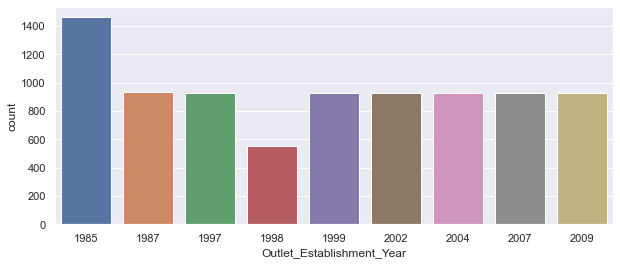

In [17]:
#Outlet_Establishment_Year count
plt.figure(figsize=(10,4))
sns.countplot(x="Outlet_Establishment_Year",data=df)
plt.show()

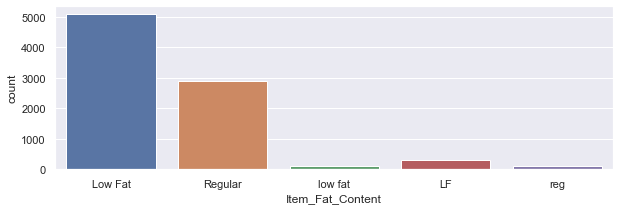

In [18]:
#Item_Fat_Content count
plt.figure(figsize=(10,3))
sns.countplot(x="Item_Fat_Content",data=df)
plt.show()

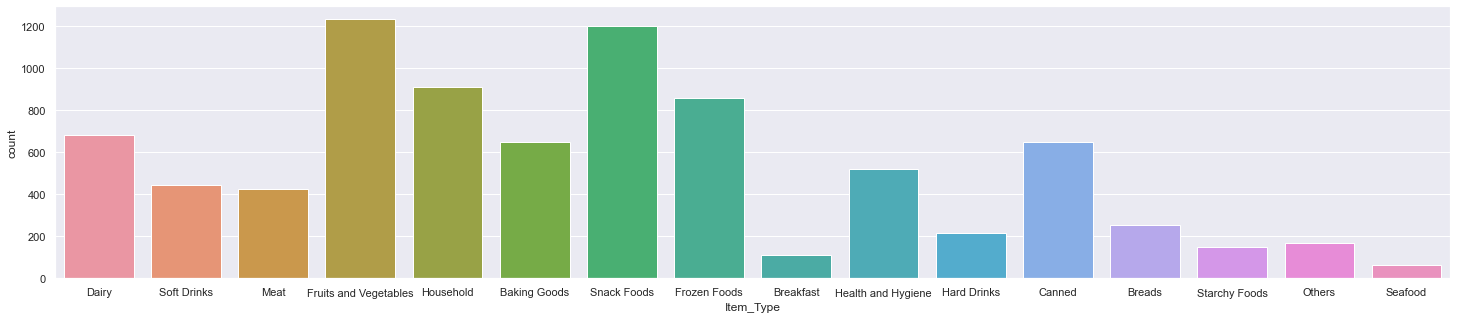

In [19]:
#Item_Type count
plt.figure(figsize=(25,5))
sns.countplot(x="Item_Type",data=df)
plt.show()

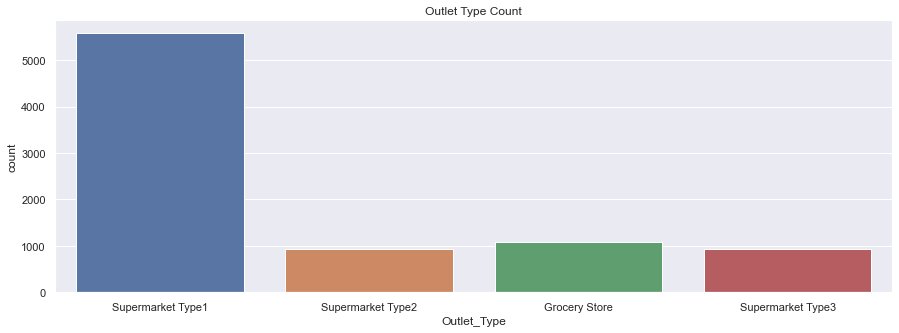

In [20]:
#Outlet_Type column
plt.figure(figsize=(15,5))
sns.countplot(x="Outlet_Type",data=df)
plt.title('Outlet Type Count')
plt.show()

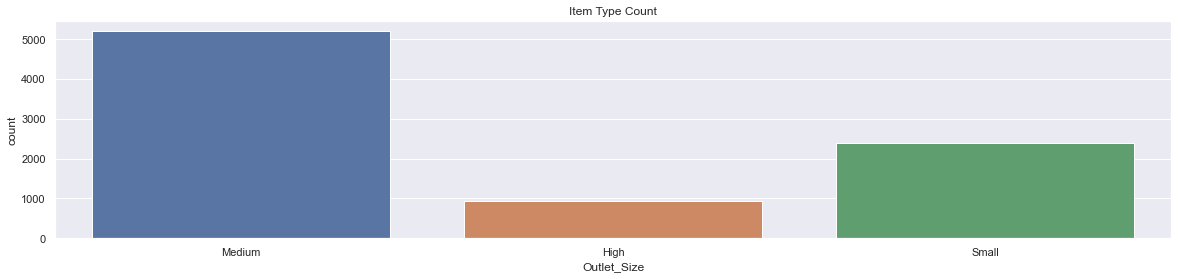

In [21]:
#Outlet_Size column
plt.figure(figsize=(20,4))
df["Outlet_Size"]=df["Outlet_Size"].astype(str)
sns.countplot(x="Outlet_Size",data=df)
plt.title('Item Type Count')
plt.show()

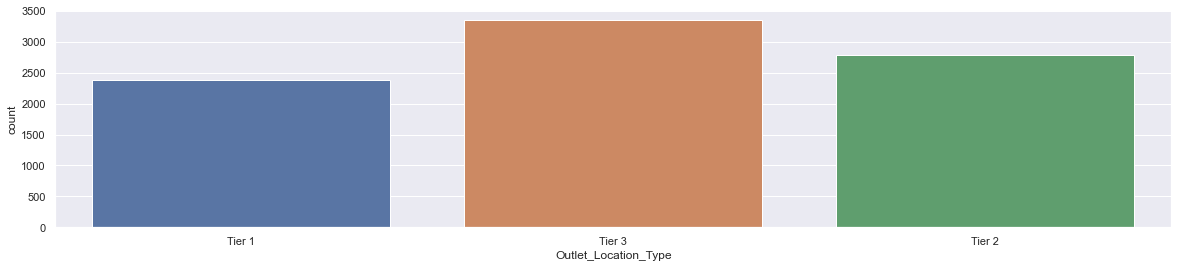

In [22]:
#Outlet_Size column
plt.figure(figsize=(20,4))
df["Outlet_Location_Type"]=df["Outlet_Location_Type"].astype(str)
sns.countplot(x="Outlet_Location_Type",data=df)
plt.show()

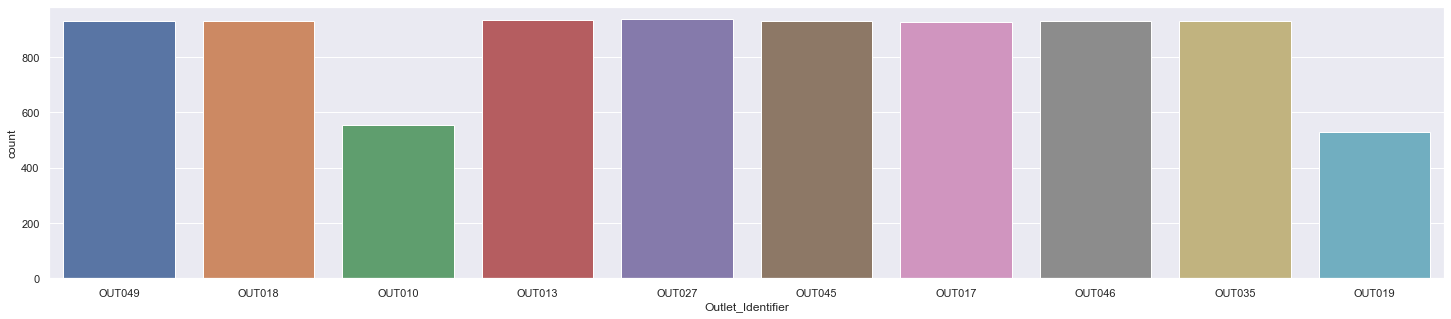

In [23]:
#Outlet_Size column
plt.figure(figsize=(25,5))
df["Outlet_Identifier"]=df["Outlet_Identifier"].astype(str)
sns.countplot(x="Outlet_Identifier",data=df)
plt.show()

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [26]:
#Change five categories to two objects
df.replace({"Item_Fat_Content":{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [27]:
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Item_Identifier"]=encoder.fit_transform(df["Item_Identifier"])
df["Item_Fat_Content"]=encoder.fit_transform(df["Item_Fat_Content"])
df["Item_Type"]=encoder.fit_transform(df["Item_Type"])
df["Outlet_Identifier"]=encoder.fit_transform(df["Outlet_Identifier"])
df["Outlet_Size"]=encoder.fit_transform(df["Outlet_Size"])
df["Outlet_Location_Type"]=encoder.fit_transform(df["Outlet_Location_Type"])
df["Outlet_Type"]=encoder.fit_transform(df["Outlet_Type"])

In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Spliting features and target

In [30]:
X=df.drop(columns="Item_Outlet_Sales",axis=1) #for removing column axis=1,and for row axis=0
Y=df["Item_Outlet_Sales"]
print("Features:")
print(X)
print("Target:")
print(Y)

Features:
      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092             

# Spliting data Training and Testing

In [31]:
#split data for train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=2)

In [32]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# Machine Learning Model Training

In [33]:
#Model Algorithms
def models(X_train,Y_train):
    
    #XGBRegressor
    from xgboost import XGBRegressor
    xgreg=XGBRegressor()
    xgreg.fit(X_train,Y_train)
    
    #LinearRegression
    from sklearn.linear_model import LinearRegression
    LReg = LinearRegression()
    LReg.fit(X_train,Y_train)
    
    #DecisionTreeRegressor
    from sklearn.tree import DecisionTreeRegressor
    DTree = DecisionTreeRegressor()
    DTree.fit(X_train,Y_train)
    
    #Random forest
    from sklearn.ensemble import RandomForestRegressor
    Rforest=RandomForestRegressor()
    Rforest.fit(X_train,Y_train)
    
    print("1. XGRegressor Accurecy:: ",xgreg.score(X_train,Y_train)*100,"%")
    print("2. LinearRegression Accurecy:: ",LReg.score(X_train,Y_train)*100,"%")
    print("3. Decision Tree Accurecy:: ",DTree.score(X_train,Y_train)*100,"%")
    print("4. RandomForestRegressor Accurecy:: ",Rforest.score(X_train,Y_train)*100,"%")
    
    return xgreg,LReg,DTree,Rforest

In [34]:
model=models(X_train,Y_train)

1. XGRegressor Accurecy::  85.49833167058186 %
2. LinearRegression Accurecy::  51.4058329918831 %
3. Decision Tree Accurecy::  100.0 %
4. RandomForestRegressor Accurecy::  93.8629155155061 %


In [35]:
#Prediction of XGRegressor on train data::
Y_pred_train=model[0].predict(X_train)

In [36]:
#Accuracy of Model (Apply R2_score)
from sklearn.metrics import r2_score, mean_squared_error
r2_score(Y_train,Y_pred_train)

0.8549833167058186

In [37]:
#Checking Root Mean Square error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_train,Y_pred_train))
rmse

644.7999485930311

In [38]:
#Residue of the XGRegressor Model 
residue_xgb =(Y_train-Y_pred_train)

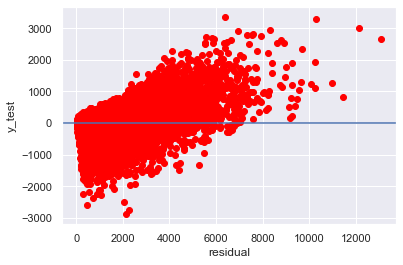

In [39]:
#Plotting Residual Plot
plt.scatter(Y_train,residue_xgb, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

In [40]:
#Prediction of XGRegressor on test data::
Y_pred_test=model[1].predict(X_test)

In [41]:
#Accuracy of Model (Apply R2_score)
from sklearn.metrics import r2_score, mean_squared_error
r2_score(Y_test,Y_pred_test)

0.49498230467978976

In [42]:
#Checking Root Mean Square error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test,Y_pred_test))
rmse

1248.6101695726868

In [43]:
#Dumping the model
from joblib import dump
dump(model[0],"Big_Mart_Sales_Prediction.joblib")

['Big_Mart_Sales_Prediction.joblib']

# Loading Test Data:

In [44]:
df2=pd.read_csv("Test.csv")
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [45]:
df2.shape

(5681, 11)

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [47]:
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [48]:
#Mean value of Item_Weight column
weight=df2["Item_Weight"].mean()
weight

12.695633368756374

In [49]:
size=df2["Outlet_Size"].mode()[0]
size

'Medium'

In [50]:
#Fill missing value with the Mean value in Item_Weight column
df2["Item_Weight"].fillna(weight,inplace=True)
df2["Outlet_Size"].fillna(size,inplace=True)
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [51]:
#check if any missing values exists or not
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [52]:
# Statistical measure about data
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


C:\Anacondas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


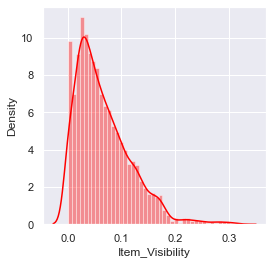

In [53]:
#VISUALIZING THE DATASET Item_Visibility
fig= plt.subplots(figsize = (4,4))
sns.distplot(df2["Item_Visibility"],color = "red")
plt.show()

C:\Anacondas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


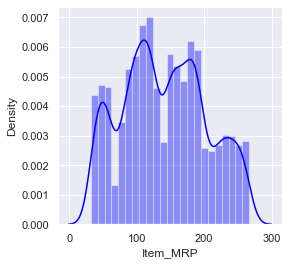

In [54]:
#VISUALIZING THE DATASET Item_MRP
fig= plt.subplots(figsize = (4,4))
sns.distplot(df2["Item_MRP"],color = "blue")
plt.show()

C:\Anacondas\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


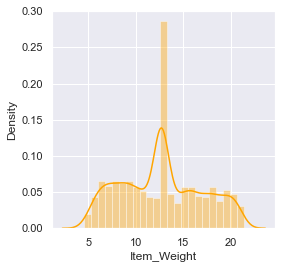

In [55]:
#VISUALIZING THE DATASET Item_Weight
fig= plt.subplots(figsize = (4,4))
sns.distplot(df2["Item_Weight"],color = "orange")
plt.show()

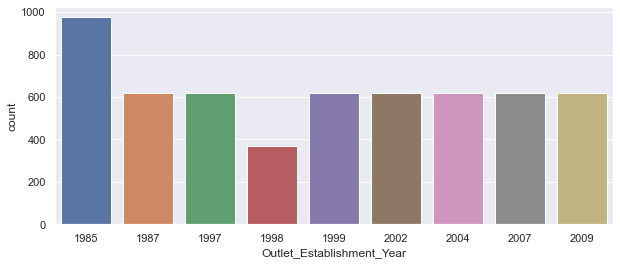

In [56]:
#Outlet_Establishment_Year count
plt.figure(figsize=(10,4))
sns.countplot(x="Outlet_Establishment_Year",data=df2)
plt.show()

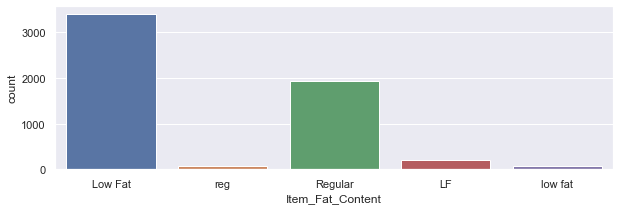

In [57]:
#Item_Fat_Content count
plt.figure(figsize=(10,3))
sns.countplot(x="Item_Fat_Content",data=df2)
plt.show()

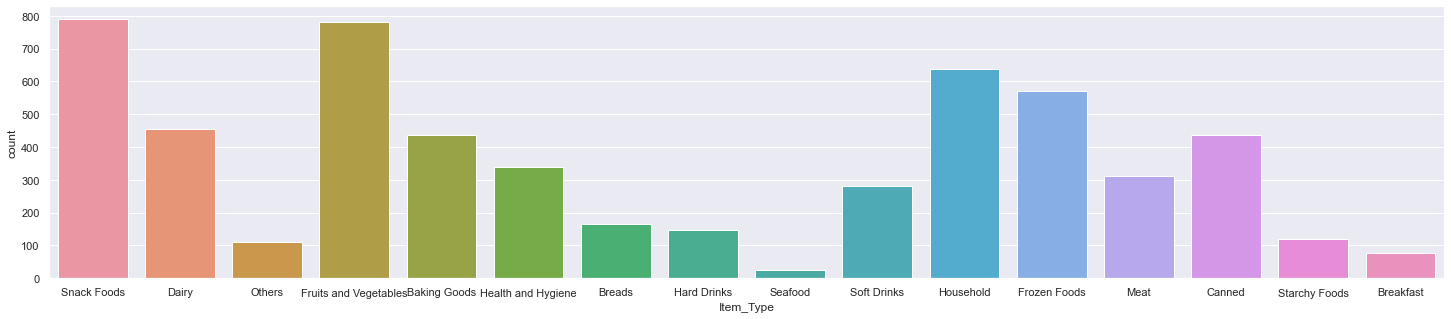

In [58]:
#Item_Type count
plt.figure(figsize=(25,5))
sns.countplot(x="Item_Type",data=df2)
plt.show()

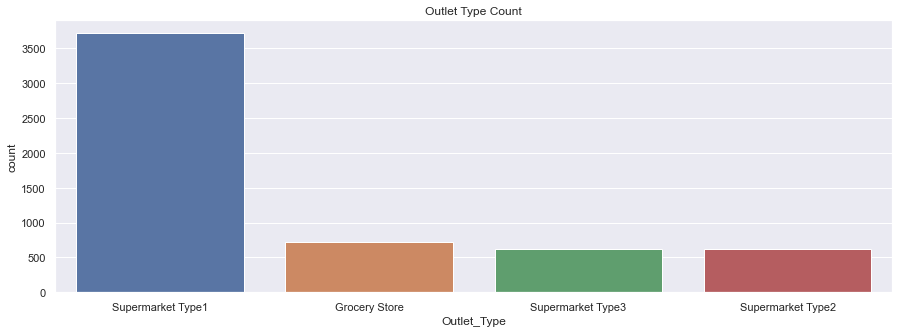

In [59]:
#Outlet_Type column
plt.figure(figsize=(15,5))
sns.countplot(x="Outlet_Type",data=df2)
plt.title('Outlet Type Count')
plt.show()

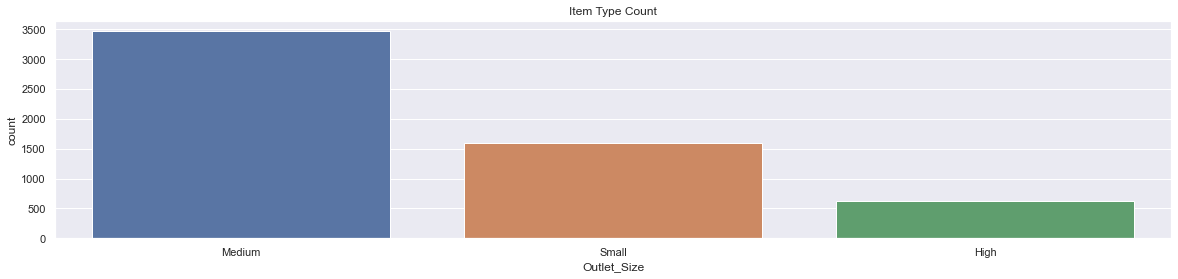

In [60]:
#Outlet_Size column
plt.figure(figsize=(20,4))
df2["Outlet_Size"]=df2["Outlet_Size"].astype(str)
sns.countplot(x="Outlet_Size",data=df2)
plt.title('Item Type Count')
plt.show()

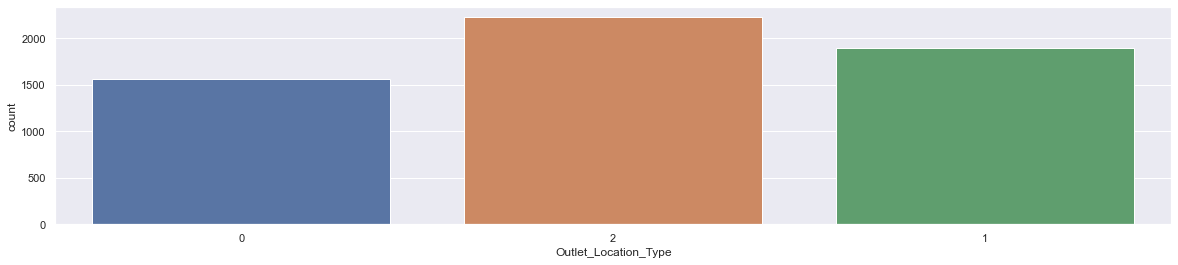

In [61]:
#Outlet_Size column
plt.figure(figsize=(20,4))
df2["Outlet_Location_Type"]=df["Outlet_Location_Type"].astype(str)
sns.countplot(x="Outlet_Location_Type",data=df2)
plt.show()

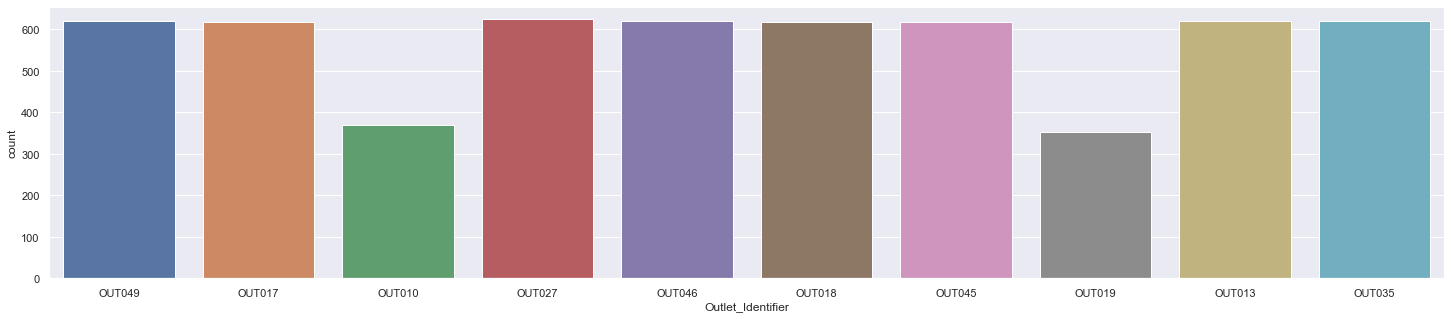

In [62]:
#Outlet_Size column
plt.figure(figsize=(25,5))
df2["Outlet_Identifier"]=df2["Outlet_Identifier"].astype(str)
sns.countplot(x="Outlet_Identifier",data=df2)
plt.show()

In [63]:
df2["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [64]:
#Change five categories to two objects
df2.replace({"Item_Fat_Content":{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [65]:
df2["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df2["Item_Identifier"]=encoder.fit_transform(df2["Item_Identifier"])
df2["Item_Fat_Content"]=encoder.fit_transform(df2["Item_Fat_Content"])
df2["Item_Type"]=encoder.fit_transform(df2["Item_Type"])
df2["Outlet_Identifier"]=encoder.fit_transform(df2["Outlet_Identifier"])
df2["Outlet_Size"]=encoder.fit_transform(df2["Outlet_Size"])
df2["Outlet_Location_Type"]=encoder.fit_transform(df2["Outlet_Location_Type"])
df2["Outlet_Type"]=encoder.fit_transform(df2["Outlet_Type"])
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,2,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,0,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,2,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [67]:
#Running the file
import joblib

In [68]:
mj= joblib.load("Big_Mart_Sales_Prediction.joblib")
pred=mj.predict(df2)
print("Predicted Value")
pred

Predicted Value


array([1598.1305, 1303.0024,  979.919 , ..., 1828.6305, 4661.5156,
       1488.4619], dtype=float32)